<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


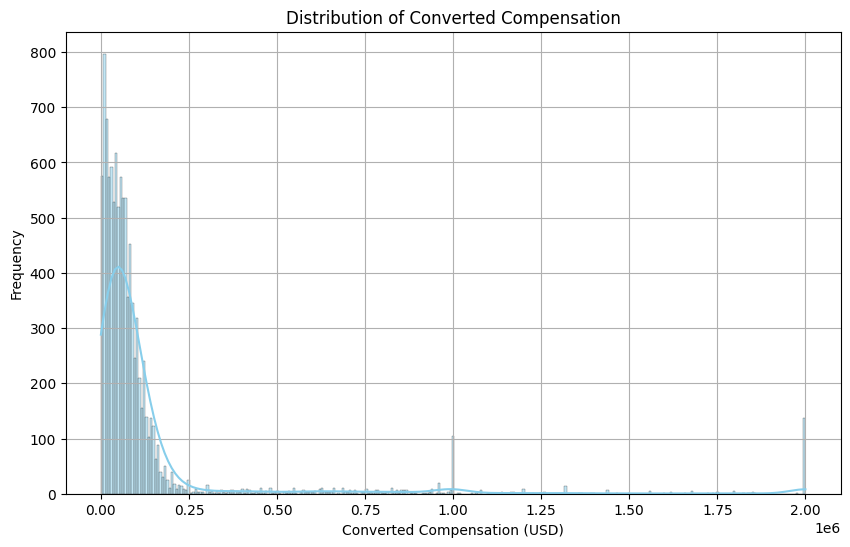

In [3]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], kde=True, color='skyblue')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Plot the histogram for the column `ConvertedComp`.


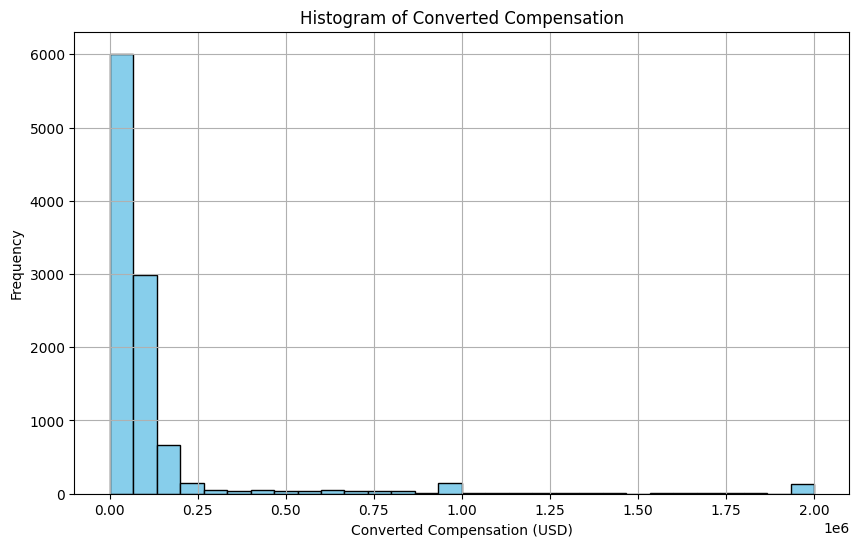

In [4]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()

print("Median of ConvertedComp column:", median_converted_comp)

Median of ConvertedComp column: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
only_man_responders = df[df['Gender'] == 'Man']

count_only_man_responders = only_man_responders.shape[0]

print("Number of responders who identified only as a Man:", count_only_man_responders)

Number of responders who identified only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
only_woman_responders = df[df['Gender'] == 'Woman']

median_only_woman_responders = only_woman_responders['ConvertedComp'].median()

print("Median of responders who identified only as a Woman:", median_only_woman_responders)

Median of responders who identified only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
five_number_summary_age = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

print("Five-number summary for the column Age:")
print("Minimum:", five_number_summary_age['min'])
print("First Quartile (Q1):", five_number_summary_age['25%'])
print("Median (Second Quartile, Q2):", five_number_summary_age['50%'])
print("Third Quartile (Q3):", five_number_summary_age['75%'])
print("Maximum:", five_number_summary_age['max'])

Five-number summary for the column Age:
Minimum: 16.0
First Quartile (Q1): 25.0
Median (Second Quartile, Q2): 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


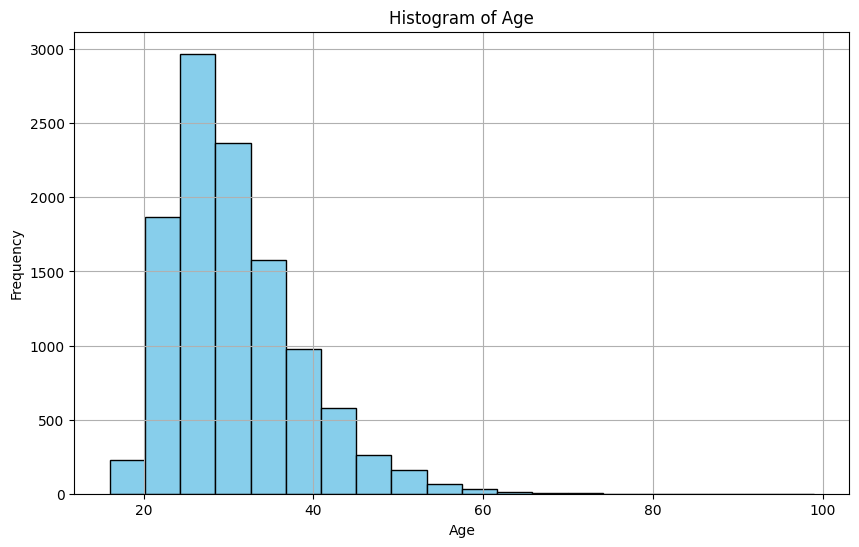

In [9]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


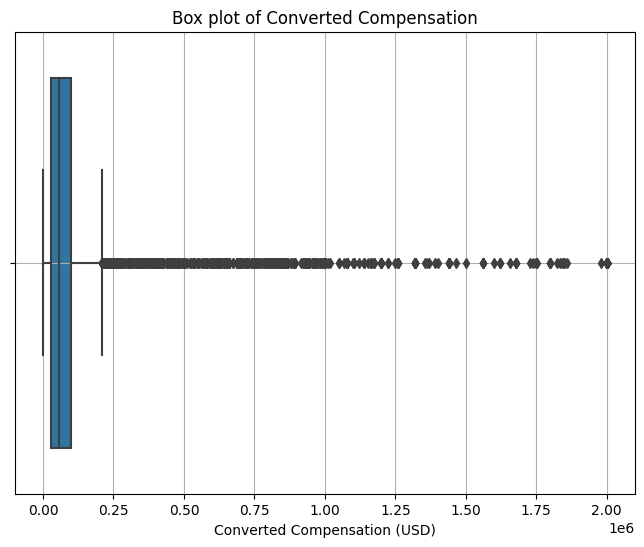

In [13]:
# your code goes here
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedComp'], orient='h')
plt.title('Box plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

print("Interquartile Range (IQR) for the column ConvertedComp:", IQR)

Interquartile Range (IQR) for the column ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [15]:
# your code goes here
upper_bound = Q3 + 1.5 * IQR

lower_bound = Q1 - 1.5 * IQR

print("Upper bound for outliers detection:", upper_bound)
print("Lower bound for outliers detection:", lower_bound)

Upper bound for outliers detection: 209698.0
Lower bound for outliers detection: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

num_outliers = outliers.shape[0]

print("Number of outliers in the ConvertedComp column:", num_outliers)

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("Shape of the DataFrame without outliers:", df_no_outliers.shape)

Shape of the DataFrame without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

age_corr = numeric_columns.corrwith(df['Age'])

print("Correlation between Age and other numerical columns:")
print(age_corr)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
